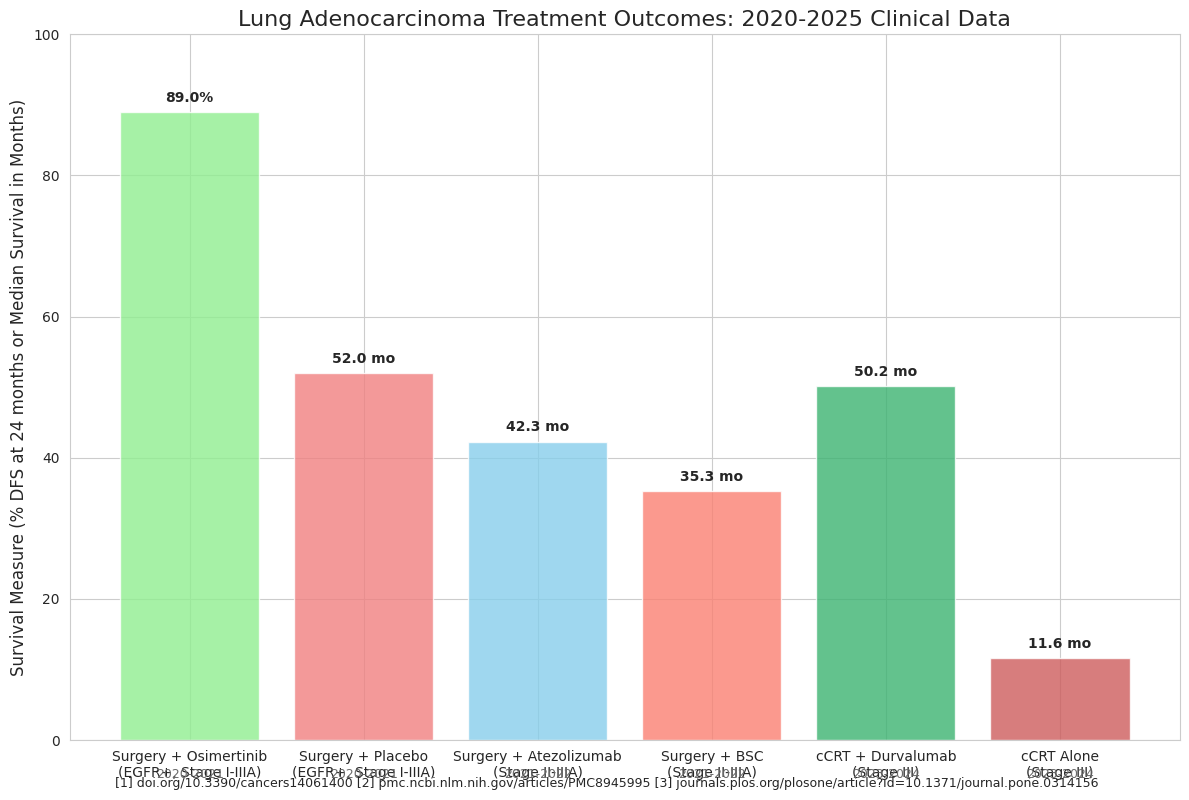

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Data for different lung adenocarcinoma treatments and their outcomes
# Based on clinical trials from 2020-2025
treatments = [
    'Surgery + Osimertinib\n(EGFR+, Stage I-IIIA)',
    'Surgery + Placebo\n(EGFR+, Stage I-IIIA)',
    'Surgery + Atezolizumab\n(Stage II-IIIA)',
    'Surgery + BSC\n(Stage II-IIIA)',
    'cCRT + Durvalumab\n(Stage III)',
    'cCRT Alone\n(Stage III)'
]

# Survival outcomes in months or percentage
survival_values = [
    89,    # "89% (95% CI, 85 to 92)" DFS at 24 months with osimertinib
    52,    # "52% (95% CI, 46 to 58)" DFS at 24 months with placebo
    42.3,  # "42.3 months" median DFS with atezolizumab
    35.3,  # "35.3 months" median DFS with best supportive care
    50.2,  # "50.2 (95% CI:41.4, not reached)" months median OS with durvalumab
    11.6   # "11.6 (95% CI:6.5,15.9) months" median OS with cCRT alone
]

# Years of data publication/reporting
years = [
    "2020-2021",
    "2020-2021",
    "2021-2022",
    "2021-2022",
    "2023-2024",
    "2023-2024"
]

# Define colors based on treatment approach
colors = ['lightgreen', 'lightcoral', 'skyblue', 'salmon', 'mediumseagreen', 'indianred']

# Create bars
bars = plt.bar(treatments, survival_values, color=colors, alpha=0.8)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 80:  # Likely a percentage
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height}%',
                ha='center', va='bottom', fontweight='bold')
    else:  # Likely months
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height} mo',
                ha='center', va='bottom', fontweight='bold')

# Add study years as text below bars
for i, (bar, year) in enumerate(zip(bars, years)):
    plt.text(bar.get_x() + bar.get_width()/2., -4,
            year,
            ha='center', va='top', rotation=0,
            fontsize=9, color='dimgray')

# Customize plot
plt.title('Lung Adenocarcinoma Treatment Outcomes: 2020-2025 Clinical Data', fontsize=16)
plt.ylabel('Survival Measure (% DFS at 24 months or Median Survival in Months)', fontsize=12)
plt.ylim(0, 100)  # Set limit to accommodate percentage values

# Add footnotes with citations
plt.figtext(0.1, 0.01,
           "[1] doi.org/10.3390/cancers14061400 [2] pmc.ncbi.nlm.nih.gov/articles/PMC8945995 [3] journals.plos.org/plosone/article?id=10.1371/journal.pone.0314156",
           fontsize=9)

plt.tight_layout()
plt.savefig('lung_adenocarcinoma_treatment_trends.png', dpi=300, bbox_inches='tight')
plt.show()

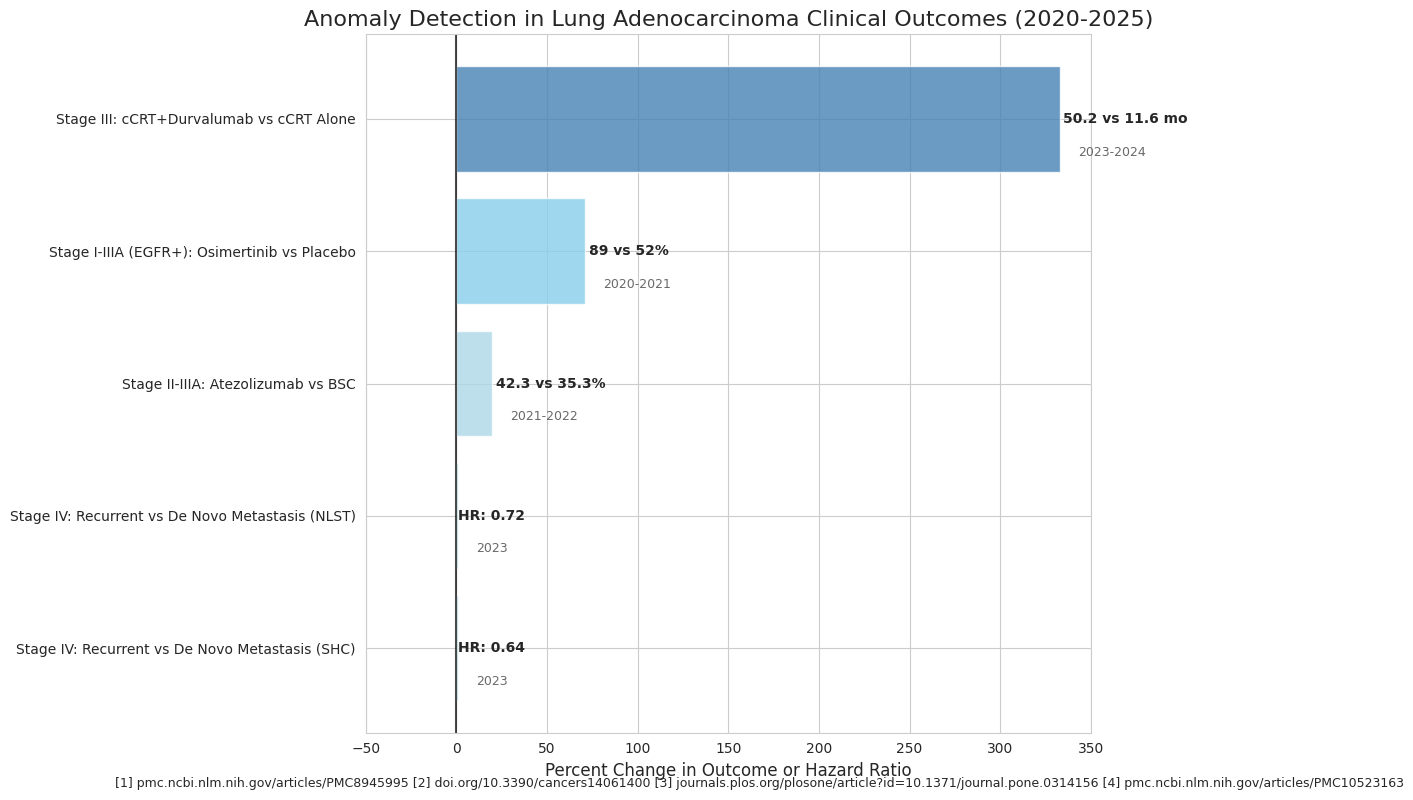

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Data for different clinical scenarios
scenarios = [
    'Stage II-IIIA: Atezolizumab vs BSC',
    'Stage I-IIIA (EGFR+): Osimertinib vs Placebo',
    'Stage III: cCRT+Durvalumab vs cCRT Alone',
    'Stage IV: Recurrent vs De Novo Metastasis (NLST)',
    'Stage IV: Recurrent vs De Novo Metastasis (SHC)'
]

# Define the expected outcome (reference/standard treatment)
expected_outcomes = [
    35.3,  # "35.3 months" median DFS with best supportive care
    52,    # "52% (95% CI, 46 to 58)" DFS at 24 months with placebo
    11.6,  # "11.6 (95% CI:6.5,15.9) months" median OS with cCRT alone
    1.0,   # Reference HR=1.0 for de novo metastasis
    1.0    # Reference HR=1.0 for de novo metastasis in SHC
]

# Define the actual outcome (experimental treatment)
actual_outcomes = [
    42.3,  # "42.3 months" median DFS with atezolizumab
    89,    # "89% (95% CI, 85 to 92)" DFS at 24 months with osimertinib
    50.2,  # "50.2 (95% CI:41.4, not reached)" months median OS with durvalumab
    0.72,  # "adjusted HR, 0.72; 95% CI, 0.60–0.87; P < .001" for recurrent metastasis
    0.64   # "aHR, 0.64; 95% CI, 0.43–0.96; P = .03" for recurrent metastasis
]

# Calculate the difference or ratio as appropriate
differences = []
for exp, act in zip(expected_outcomes, actual_outcomes):
    if exp == 1.0:  # HR values
        differences.append(act)  # Just use the HR directly
    else:
        # For survival times/percentages, calculate percent change
        diff_pct = ((act - exp) / exp) * 100
        differences.append(diff_pct)

# Years of data reporting
years = [
    "2021-2022",
    "2020-2021",
    "2023-2024",
    "2023",
    "2023"
]

# Define colors based on magnitude of difference
colors = []
for diff in differences:
    if diff < 0:
        colors.append('indianred')
    elif diff < 50:
        colors.append('lightblue')
    elif diff < 100:
        colors.append('skyblue')
    else:
        colors.append('steelblue')

# Sort by magnitude of anomaly (difference)
sorted_indices = np.argsort(np.abs(differences))
scenarios = [scenarios[i] for i in sorted_indices]
differences = [differences[i] for i in sorted_indices]
years = [years[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]
expected_outcomes = [expected_outcomes[i] for i in sorted_indices]
actual_outcomes = [actual_outcomes[i] for i in sorted_indices]

# Create horizontal bars showing the anomalies
bars = plt.barh(scenarios, differences, color=colors, alpha=0.8)

# Add a vertical line at zero
plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)

# Add data labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    if expected_outcomes[i] == 1.0:  # HR values
        label_text = f'HR: {actual_outcomes[i]}'
        plt.text(width + (0.01 if width >= 0 else -0.05),
                bar.get_y() + bar.get_height()/2,
                label_text, ha='left' if width >= 0 else 'right',
                va='center', fontweight='bold')
    else:
        # For survival times/percentages
        label_text = f'{actual_outcomes[i]} vs {expected_outcomes[i]}'
        if expected_outcomes[i] > 20:  # Likely percentages
            label_text += '%'
        else:
            label_text += ' mo'

        plt.text(width + (2 if width >= 0 else -2),
                bar.get_y() + bar.get_height()/2,
                label_text, ha='left' if width >= 0 else 'right',
                va='center', fontweight='bold')

# Add study years as text at end of bars
for i, (bar, year) in enumerate(zip(bars, years)):
    plt.text(bar.get_width() + (10 if bar.get_width() >= 0 else -10),
            bar.get_y() + bar.get_height()/2 - 0.25,
            year,
            ha='left' if bar.get_width() >= 0 else 'right',
            va='center', fontsize=9, color='dimgray')

# Customize plot
plt.title('Anomaly Detection in Lung Adenocarcinoma Clinical Outcomes (2020-2025)', fontsize=16)
plt.xlabel('Percent Change in Outcome or Hazard Ratio', fontsize=12)
plt.xlim(-50, 350)  # Adjust based on your data

# Add footnotes with citations
plt.figtext(0.1, 0.01,
           "[1] pmc.ncbi.nlm.nih.gov/articles/PMC8945995 [2] doi.org/10.3390/cancers14061400 " +
           "[3] journals.plos.org/plosone/article?id=10.1371/journal.pone.0314156 [4] pmc.ncbi.nlm.nih.gov/articles/PMC10523163",
           fontsize=9)

plt.tight_layout()
plt.savefig('lung_adenocarcinoma_anomaly_detection.png', dpi=300, bbox_inches='tight')
plt.show()

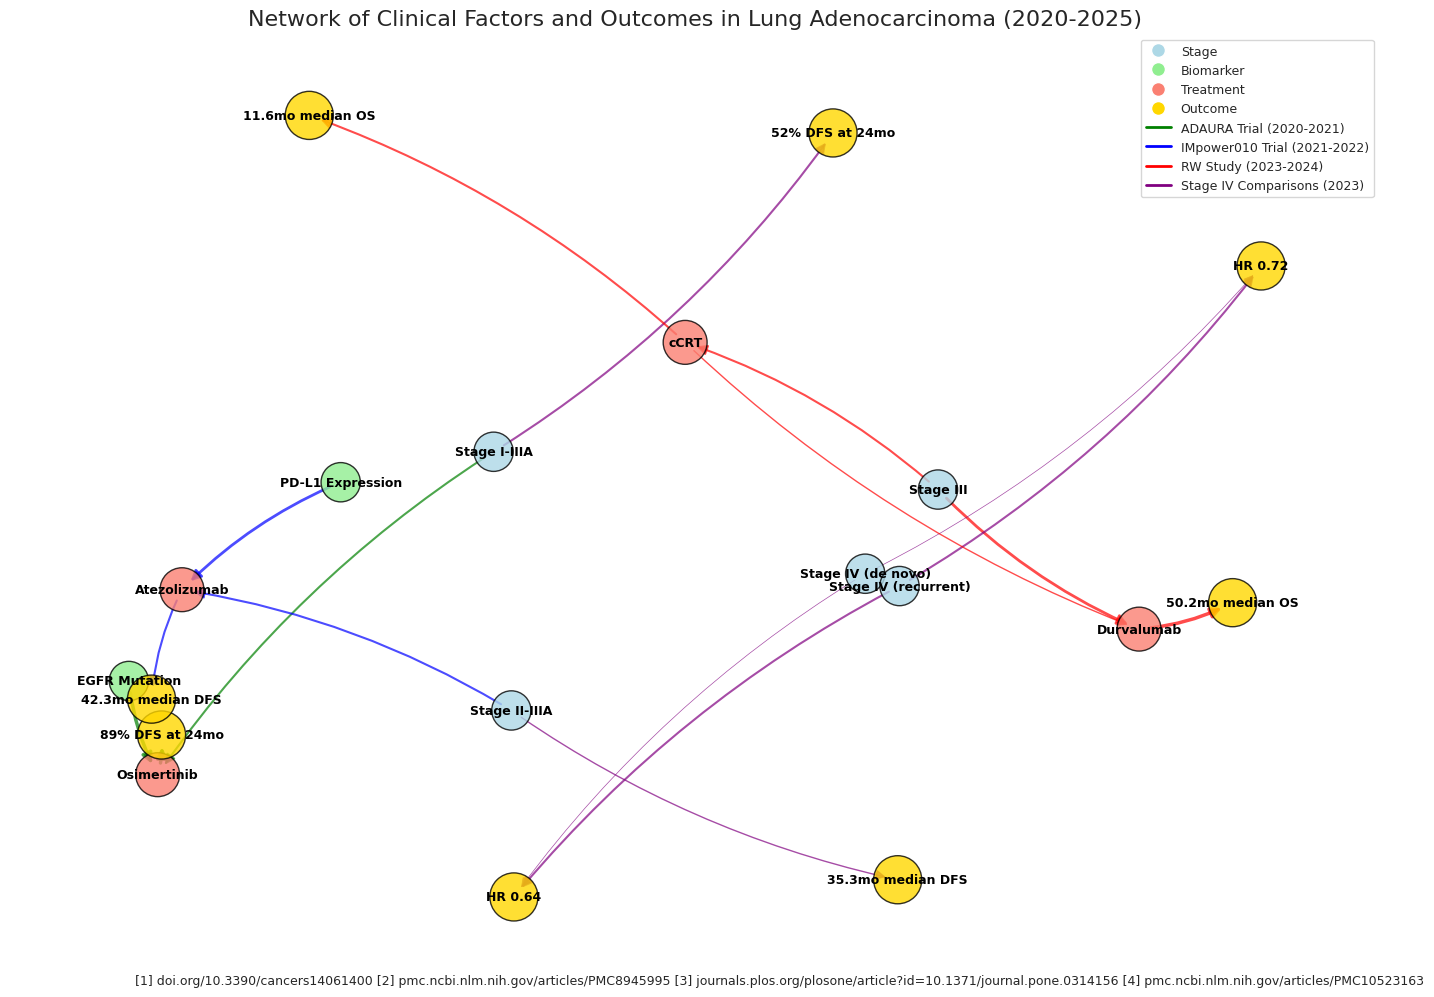

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define nodes (factors and outcomes)
# Stages
G.add_node("Stage I-IIIA", type="stage", year="2020-2025")
G.add_node("Stage II-IIIA", type="stage", year="2020-2025")
G.add_node("Stage III", type="stage", year="2020-2025")
G.add_node("Stage IV (de novo)", type="stage", year="2020-2025")
G.add_node("Stage IV (recurrent)", type="stage", year="2020-2025")

# Biomarkers
G.add_node("EGFR Mutation", type="biomarker", year="2020-2025")
G.add_node("PD-L1 Expression", type="biomarker", year="2020-2025")

# Treatments
G.add_node("Osimertinib", type="treatment", year="2020-2021")
G.add_node("Atezolizumab", type="treatment", year="2021-2022")
G.add_node("Durvalumab", type="treatment", year="2023-2024")
G.add_node("cCRT", type="treatment", year="2023-2024")

# Outcomes
G.add_node("89% DFS at 24mo", type="outcome", year="2020-2021")
G.add_node("52% DFS at 24mo", type="outcome", year="2020-2021")
G.add_node("42.3mo median DFS", type="outcome", year="2021-2022")
G.add_node("35.3mo median DFS", type="outcome", year="2021-2022")
G.add_node("50.2mo median OS", type="outcome", year="2023-2024")
G.add_node("11.6mo median OS", type="outcome", year="2023-2024")
G.add_node("HR 0.72", type="outcome", year="2023")
G.add_node("HR 0.64", type="outcome", year="2023")

# Define edges with weights based on strength of correlation/effect
# EGFR mutation pathway
G.add_edge("EGFR Mutation", "Osimertinib", weight=5, study="ADAURA")
G.add_edge("Stage I-IIIA", "Osimertinib", weight=3, study="ADAURA")
G.add_edge("Osimertinib", "89% DFS at 24mo", weight=5, study="ADAURA")
G.add_edge("Stage I-IIIA", "52% DFS at 24mo", weight=3, study="ADAURA (Placebo)")

# Immunotherapy pathway - Stage II-III
G.add_edge("Stage II-IIIA", "Atezolizumab", weight=3, study="IMpower010")
G.add_edge("PD-L1 Expression", "Atezolizumab", weight=4, study="IMpower010")
G.add_edge("Atezolizumab", "42.3mo median DFS", weight=3, study="IMpower010")
G.add_edge("Stage II-IIIA", "35.3mo median DFS", weight=2, study="IMpower010 (BSC)")

# Stage III pathway
G.add_edge("Stage III", "cCRT", weight=3, study="RW Study")
G.add_edge("Stage III", "Durvalumab", weight=4, study="RW Study")
G.add_edge("cCRT", "11.6mo median OS", weight=3, study="RW Study")
G.add_edge("cCRT", "Durvalumab", weight=2, study="RW Study")
G.add_edge("Durvalumab", "50.2mo median OS", weight=5, study="RW Study")

# Stage IV pathway
G.add_edge("Stage IV (de novo)", "HR 0.72", weight=1, study="NLST Comparison")
G.add_edge("Stage IV (recurrent)", "HR 0.72", weight=3, study="NLST Comparison")
G.add_edge("Stage IV (de novo)", "HR 0.64", weight=1, study="SHC Comparison")
G.add_edge("Stage IV (recurrent)", "HR 0.64", weight=3, study="SHC Comparison")

# Get positions using a layout algorithm
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Set figure size
plt.figure(figsize=(14, 10))

# Define node colors by type
node_colors = {
    "stage": "lightblue",
    "biomarker": "lightgreen",
    "treatment": "salmon",
    "outcome": "gold"
}

# Create a list of colors for nodes
node_color_list = [node_colors[G.nodes[node]["type"]] for node in G.nodes()]

# Create a list of node sizes based on type
node_size_list = []
for node in G.nodes():
    if G.nodes[node]["type"] == "outcome":
        node_size_list.append(1200)
    elif G.nodes[node]["type"] == "treatment":
        node_size_list.append(1000)
    else:
        node_size_list.append(800)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_color=node_color_list,
                       node_size=node_size_list,
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=1)

# Create edge weights for thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Create a custom colormap for edges based on study
edge_colors = []
for u, v in G.edges():
    study = G[u][v]['study']
    if study == "ADAURA":
        edge_colors.append('green')
    elif study == "IMpower010":
        edge_colors.append('blue')
    elif study == "RW Study":
        edge_colors.append('red')
    else:  # Stage IV comparisons
        edge_colors.append('purple')

# Draw edges with varying thickness based on weight
nx.draw_networkx_edges(G, pos,
                       width=[w/2 for w in edge_weights],
                       edge_color=edge_colors,
                       alpha=0.7,
                       arrowsize=15,
                       connectionstyle='arc3,rad=0.1')

# Draw node labels with smaller font
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Create legend elements for node types
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Stage'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='Biomarker'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Treatment'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Outcome')
]

# Create legend elements for edge studies
legend_elements += [
    plt.Line2D([0], [0], color='green', lw=2, label='ADAURA Trial (2020-2021)'),
    plt.Line2D([0], [0], color='blue', lw=2, label='IMpower010 Trial (2021-2022)'),
    plt.Line2D([0], [0], color='red', lw=2, label='RW Study (2023-2024)'),
    plt.Line2D([0], [0], color='purple', lw=2, label='Stage IV Comparisons (2023)')
]

# Add the legend
plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

# Add title and citation
plt.title('Network of Clinical Factors and Outcomes in Lung Adenocarcinoma (2020-2025)', fontsize=16)
plt.figtext(0.1, 0.01,
           "[1] doi.org/10.3390/cancers14061400 [2] pmc.ncbi.nlm.nih.gov/articles/PMC8945995 " +
           "[3] journals.plos.org/plosone/article?id=10.1371/journal.pone.0314156 [4] pmc.ncbi.nlm.nih.gov/articles/PMC10523163",
           fontsize=9)

plt.tight_layout()
plt.axis('off')
plt.savefig('lung_adenocarcinoma_network_analysis.png', dpi=300, bbox_inches='tight')
plt.show()